### An exploration of energy productivity in heavy industry
#### (Steel and cement initially)

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from openpyxl import Workbook
import xlsxwriter
import pandas.io.formats.excel
import glob
from pandas import ExcelWriter 
import seaborn as sns

In [2]:
# Path mapping to data folder
data_folder = '../../data'

# Read in industry production sheets
industry_prod_sheets = list(pd.read_excel(data_folder + '/heavy_industry_production.xlsx', sheet_name = None).keys())

# Now read in the data from those sheets and save in a consolidated dataframe
ind_dfs_list = list()

for sheet in industry_prod_sheets:
    ind_dfs_list.append(pd.read_excel(data_folder + '/heavy_industry_production.xlsx', sheet_name = sheet))

ind_prod = pd.concat(ind_dfs_list).reset_index(drop = True)

In [3]:
# Now read in IEA data
# First, in order to quickly extract sheet names for the for loop below
IEA_temp = pd.ExcelFile(data_folder + '/IEA2021_link.xlsx')

IEA_dfs_list = list()

for sheet in IEA_temp.sheet_names[:-2]:
    interim_df = pd.read_excel(data_folder + '/IEA2021_link.xlsx', sheet_name = sheet, header = 1, na_values = ['', '..', '-', 'x'])
    interim_df['ECONOMY'] = sheet
    interim_df['UNIT'] = 'TJ'
    IEA_dfs_list.append(interim_df)

IEA_df = pd.concat(IEA_dfs_list).reset_index(drop = True)

In [4]:
# Now, reorder the datafram columns and only keep 1990 onwards
IEA_df = IEA_df[['ECONOMY', 'FLOW', 'PRODUCT', 'UNIT'] + list(IEA_df.loc[:, 1990:2020])].reset_index(drop = True)

In [5]:
# Clean up variable by removing spaces from the beginning of strings

IEA_df['FLOW'] = IEA_df['FLOW'].str.lstrip()
IEA_df['PRODUCT'] = IEA_df['PRODUCT'].str.lstrip()

# Change heading names to lower case
IEA_df = IEA_df.rename(columns = {'ECONOMY': 'economy', 'FLOW': 'flow', 'PRODUCT': 'product', 'UNIT': 'unit'})

In [6]:
# Now just grab industry data 

industry_selection = ['Iron and steel', 'Chemical and petrochemical', 'Non-ferrous metals', 'Non-metallic minerals']

IEA_industry = IEA_df[IEA_df['flow'].isin(industry_selection)].copy().reset_index(drop = True)

In [7]:
# Transform dataframe to long format

IEA_industry_long = IEA_industry.melt(id_vars = ['economy', 'flow', 'product', 'unit'], var_name = 'year', value_name = 'energy')

In [8]:
# Now get industry production in long format

ind_prod_long = ind_prod.melt(id_vars = ['economy', 'item', 'unit'], var_name = 'year', value_name = 'production')

<Figure size 432x504 with 0 Axes>

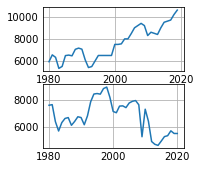

In [21]:
Aus_steel = ind_prod_long[(ind_prod_long['economy'] == '01_AUS') & (ind_prod_long['item'] == 'cement_production')]
Aus_cement = ind_prod_long[(ind_prod_long['economy'] == '01_AUS') & (ind_prod_long['item'] == 'steel_production')]
# Now make some plots of production

plt.style.use('_mpl-gallery')

fig, [ax1, ax2] = plt.subplots(2, 1)

ax1.plot('year', 'production', data = Aus_steel)
ax2.plot('year', 'production', data = Aus_cement)
plt.show()

In [10]:
# # OSeMOSYS results files
# OSeMOSYS_filenames = glob.glob(path_output + "/*.xlsx")

#  [['fuel_code', 'item_code_new'] + list(ref_tradbio_1.loc[:, '2000':'2050'])].reset_index(drop = True)
# # Reference filenames and net zero filenames

# reference_filenames = list(filter(lambda k: 'reference' in k, OSeMOSYS_filenames))
# netzero_filenames = list(filter(lambda y: 'net-zero' in y, OSeMOSYS_filenames))

# # New 2018 data variable names 

# Mapping_sheets = list(pd.read_excel(path_mapping + '/OSeMOSYS_mapping_2021.xlsx', sheet_name = None).keys())[1:]

# Mapping_file = pd.DataFrame()

# for sheet in Mapping_sheets:
#     interim_map = pd.read_excel(path_mapping + '/OSeMOSYS_mapping_2021.xlsx', sheet_name = sheet, skiprows = 1)
#     Mapping_file = Mapping_file.append(interim_map).reset_index(drop = True)



# # Read steel energy data results 
# steel_results = pd.DataFrame()

# for economy in economies:
#     interim_df = pd.read_excel('../data/input_data/1_energy_results/1_steel_2018_workbook_ref.xlsx', skiprows = 129, 
#                                 usecols = list(range(62, 120, 1)), nrows = 162, sheet_name = economy)                                       
#     steel_results = steel_results.append(interim_df)

# steel_results_numeric = steel_results.iloc[:,4:].copy()

# non_zero = (steel_results_numeric != 0).any(axis = 1)

# steel_results = steel_results.loc[non_zero].reset_index(drop = True)

# steel_results.to_csv('../results/post_projection/1_steel_reference_scenario.csv', index = False)